### Import some jupyter spesific modules

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

### Import some necessary modules

In [2]:
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D

from tabulate import tabulate
np.set_printoptions(suppress=True)

### Import data from Data Pool Class

In [3]:
from itb_data_pool import ITBDataPool
datpol = ITBDataPool()

print((' '.join(datpol.All_Vars[0:2]).replace('self.', '')))
print((' '.join(datpol.All_Vars[2:6]).replace('self.', '')))
print('\n')
print((' '.join(datpol.All_Vars[6:9]).replace('self.', '')))
print('\n')
print((' '.join(datpol.All_Vars[9:13]).replace('self.', '')))
print((' '.join(datpol.All_Vars[13:17]).replace('self.', '')))
print('\n')
print((' '.join(datpol.All_Vars[17:21]).replace('self.', '')))
print((' '.join(datpol.All_Vars[21:25]).replace('self.', '')))
print('\n')
print((' '.join(datpol.All_Vars[25:29]).replace('self.', '')))
print((' '.join(datpol.All_Vars[29:33]).replace('self.', '')))

NoUnitNoHP_Second NoUnitNoHP_Data
NoUnitMiniso_Second NoUnitMiniso_Data NoUnitBose_Second NoUnitBose_Data


Ukur_Freq Ukur_OutUp Ukur_OutDown


Day1_Bose1_Up Day1_Bose1_Down Day1_Bose2_Up Day1_Bose2_Down
Day1_Miniso1_Up Day1_Miniso1_Down Day1_Miniso2_Up Day1_Miniso2_Down


Day2_Bose1_Up Day2_Bose1_Down Day2_Bose2_Up Day2_Bose2_Down
Day2_Miniso1_Up Day2_Miniso1_Down Day2_Miniso2_Up Day2_Miniso2_Down


Day3_Bose1_Up Day3_Bose1_Down Day3_Bose2_Up Day3_Bose2_Down
Day3_Miniso1_Up Day3_Miniso1_Down Day3_Miniso2_Up Day3_Miniso2_Down


### Plot 3D in dB [SPL] function

In [4]:
def PlotSPL3D(xlabel, ydata, zdata):
    Xlabel = xlabel
    Xtick = np.arange(len(Xlabel))
    X = Xtick
    Y = ydata
    Z = zdata

    X, Y = np.meshgrid(X,Y)

    fig = plt.figure(figsize=(8,5), dpi= 100, facecolor='w', edgecolor='k')
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    ax.set_xticks(Xtick.tolist())
    ax.set_xticklabels(Xlabel,rotation=90)
    #ax.set_xlabel('Frequency')
    ax.set_ylabel('Seconds')
    #ax.set_zlabel('dB [SPL]')
    ax.set_zlim(0,110)
    fig.colorbar(surf, shrink=0.3, aspect=5)
    plt.show()

### Plot point in dB [SPL]

In [5]:
def PlotSPLPoint(xdata,ydata,judul='grafik'):
    fig = plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
    plt.plot(xdata, ydata, '-o', label=judul)
    plt.xticks(xdata)
    plt.xlabel('Out Scale')
    plt.ylabel('SPL (dB)')
    plt.ylim(0, 110)
    plt.legend(loc='best')
    plt.show()

### Plot point each frequency in dB [SPL]

In [6]:
def PlotSPLEachFreq(array_in,judul='grafik'):
    fig, axs = plt.subplots(3,2,figsize=(12,6))
    axs[0, 0].plot(datpol.Ukur_OutUp, array_in[0,:])
    axs[0, 0].set_title("250 Hz")
    axs[1, 0].plot(datpol.Ukur_OutUp, array_in[1,:])
    axs[1, 0].set_title("500 Hz")
    axs[2, 0].plot(datpol.Ukur_OutUp, array_in[2,:])
    axs[2, 0].set_title("1000 Hz")
    axs[0, 1].plot(datpol.Ukur_OutUp, array_in[3,:])
    axs[0, 1].set_title("2000 Hz")
    axs[1, 1].plot(datpol.Ukur_OutUp, array_in[4,:])
    axs[1, 1].set_title("4000 Hz")
    axs[2, 1].plot(datpol.Ukur_OutUp, array_in[5,:])
    axs[2, 1].set_title("8000 Hz")
    fig.tight_layout()
    plt.show()

### Plot 2 groups of data

In [7]:
def PlotSPLGroup(xdata, y0a, y0b, y0c, label0, y1a, y1b, y1c, label1, yrange):
    fig = plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')

    plt.plot(xdata, y0a, '-ro', label=label0)
    plt.plot(xdata, y0b, '-ro')
    plt.plot(xdata, y0b, '-ro')
        
    plt.plot(xdata, y1a, '-bo', label=label1)
    plt.plot(xdata, y1b, '-bo')
    plt.plot(xdata, y1b, '-bo')

    plt.xticks(datpol.Ukur_Freq)
    plt.xlabel('freq Hz')
    plt.ylabel('SPL (dB)')
    plt.ylim(yrange[0], yrange[1])
    plt.legend(loc='lower right')
    plt.show()

### Average Output

In [8]:
def Array3Avg(array_in):
    array_out = (array_in[0] + array_in[1] + array_in[2])/3
    return np.around(array_out,1)

### Estimasi model setiap frekuensi

In [9]:
def FreqEstim(array_in):
    c0 = np.polyfit(datpol.Ukur_OutUp, array_in[0,:], deg=3)
    print(250,np.around(c0,2))
    c1 = np.polyfit(datpol.Ukur_OutUp, array_in[1,:], deg=3)
    print(500,np.around(c1,2))
    c2 = np.polyfit(datpol.Ukur_OutUp, array_in[2,:], deg=3)
    print(1000,np.around(c2,2))
    c3 = np.polyfit(datpol.Ukur_OutUp, array_in[3,:], deg=3)
    print(2000,np.around(c3,2))
    c4 = np.polyfit(datpol.Ukur_OutUp, array_in[4,:], deg=3)
    print(4000,np.around(c4,2))
    c5 = np.polyfit(datpol.Ukur_OutUp, array_in[5,:], deg=3)
    print(8000,np.around(c5,2))
    
    model = np.around(np.array([c0,c1,c2,c3,c4,c5]),2)
    
    return model

### Histeresis Calculation

#### Hitung standar deviasi setiap elemen matrix dalam satu hari pengukuran

In [10]:
def HistCalc(array_in_up, array_in_down):
    array_in_down = array_in_down[:,:,::-1]
    array_out = np.zeros((6,9))
    
    for j in range(6):
        for i in range(9):
            array_elm = np.array([array_in_up[0,j,i], array_in_down[0,j,i],
                                  array_in_up[1,j,i], array_in_down[1,j,i],
                                  array_in_up[2,j,i], array_in_down[2,j,i]])

            array_stdev = np.std(array_elm)
            array_out[j,i] = np.around(array_stdev,1)
    
    return array_out

### Table in Latex

In [11]:
def TexTable(array_in, header_in):
    print(tabulate(array_in, header_in, tablefmt="latex"))

### Ground Data Tanpa Prototype and Tanpa Headphone

Showing only Left channel since can represent of Right channel

#### Komentar

Jika satuan data adalah dB [SPL], maka data dasar mencapai di atas 40 dB akan terasa aneh untuk suatu _un-echoic chamber_, kecuali ada pengaturan tertentu dan pembobotan khusus yang perlu dikonfirmasi kembali.

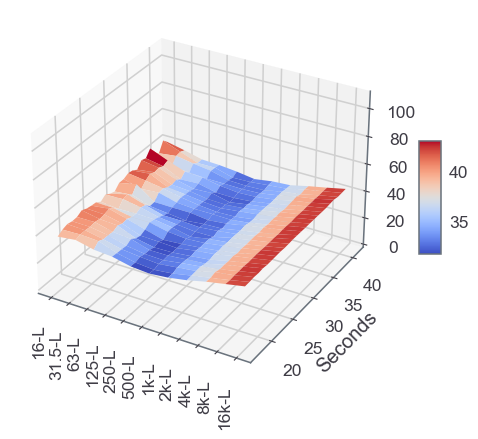

In [12]:
PlotSPL3D(
    datpol.Octave_FreqStr[0::2], #Take Left Only
    datpol.NoUnitNoHP_Second,
    datpol.NoUnitNoHP_Data[:,0::2]) #Take Left Only

### Ground Data Headphone Miniso tanpa Prototype


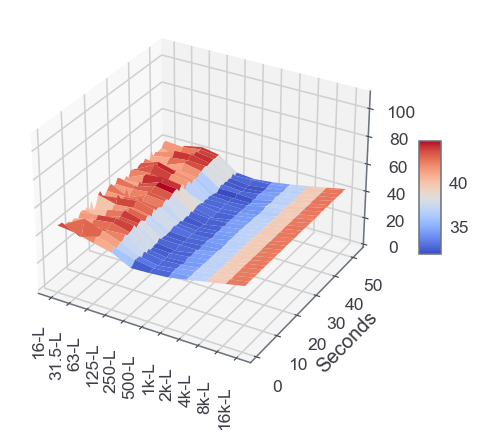

In [13]:
PlotSPL3D(
    datpol.Octave_FreqStr[0::2], #Take Left Only
    datpol.NoUnitMiniso_Second,
    datpol.NoUnitMiniso_Data[:,0::2]) #Take Left Only

### Ground Data Headphone BOSE tanpa Prototype

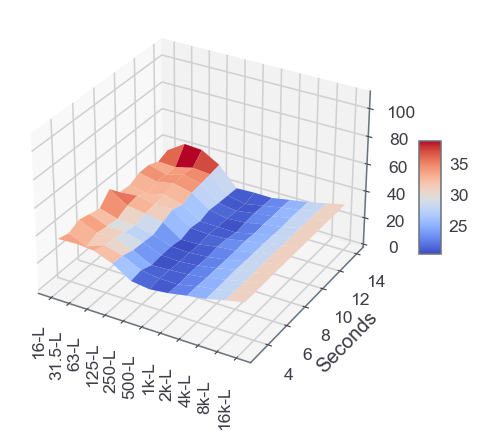

In [14]:
PlotSPL3D(
    datpol.Octave_FreqStr[0::2], #Take Left Only
    datpol.NoUnitBose_Second,
    datpol.NoUnitBose_Data[:,0::2]) #Take Left Only

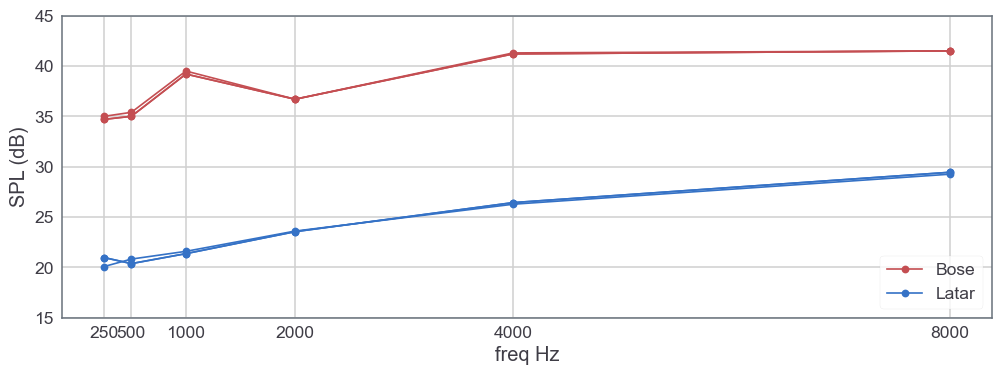

In [15]:
PlotSPLGroup(datpol.Ukur_Freq, datpol.Day1_Bose1_Up[0,:,0], datpol.Day1_Bose1_Up[1,:,0], datpol.Day1_Bose1_Up[2,:,0], 'Bose',
             datpol.NoUnitBose_Data[2,8:20:2], datpol.NoUnitBose_Data[4,8:20:2], datpol.NoUnitBose_Data[6,8:20:2], 'Latar', [15,45])

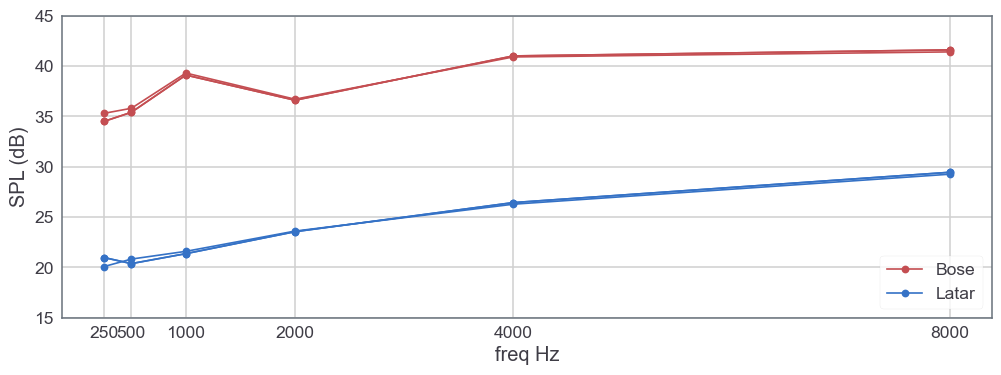

In [16]:
PlotSPLGroup(datpol.Ukur_Freq, datpol.Day1_Bose2_Up[0,:,0], datpol.Day1_Bose2_Up[1,:,0], datpol.Day1_Bose2_Up[2,:,0], 'Bose',
             datpol.NoUnitBose_Data[2,8:20:2], datpol.NoUnitBose_Data[4,8:20:2], datpol.NoUnitBose_Data[6,8:20:2], 'Latar', [15,45])

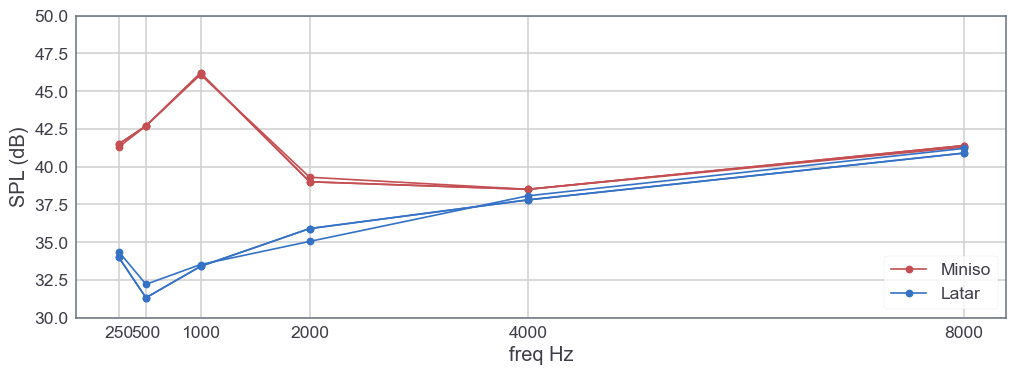

In [17]:
PlotSPLGroup(datpol.Ukur_Freq, datpol.Day1_Miniso1_Up[0,:,0], datpol.Day1_Miniso1_Up[1,:,0], datpol.Day1_Miniso1_Up[2,:,0], 'Miniso',
            datpol.NoUnitMiniso_Data[2,8:20:2], datpol.NoUnitMiniso_Data[4,8:20:2], datpol.NoUnitMiniso_Data[6,8:20:2], 'Latar', [30, 50])

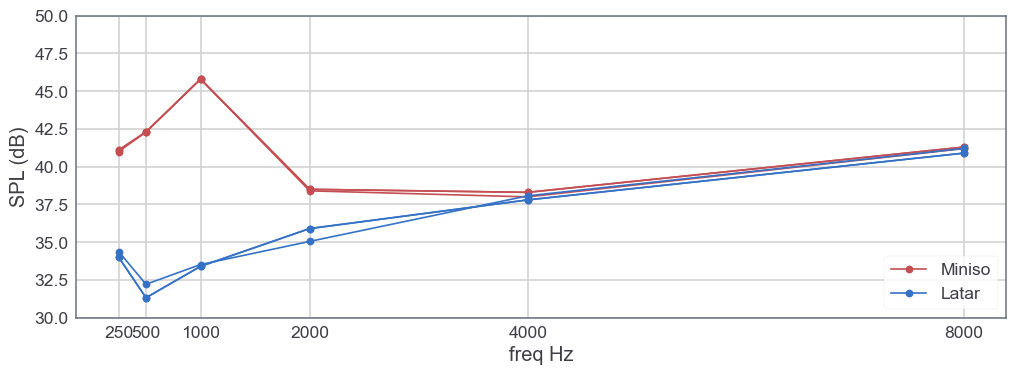

In [18]:
PlotSPLGroup(datpol.Ukur_Freq, datpol.Day1_Miniso2_Up[0,:,0], datpol.Day1_Miniso2_Up[1,:,0], datpol.Day1_Miniso2_Up[2,:,0], 'Miniso',
            datpol.NoUnitMiniso_Data[2,8:20:2], datpol.NoUnitMiniso_Data[4,8:20:2], datpol.NoUnitMiniso_Data[6,8:20:2], 'Latar', [30, 50])

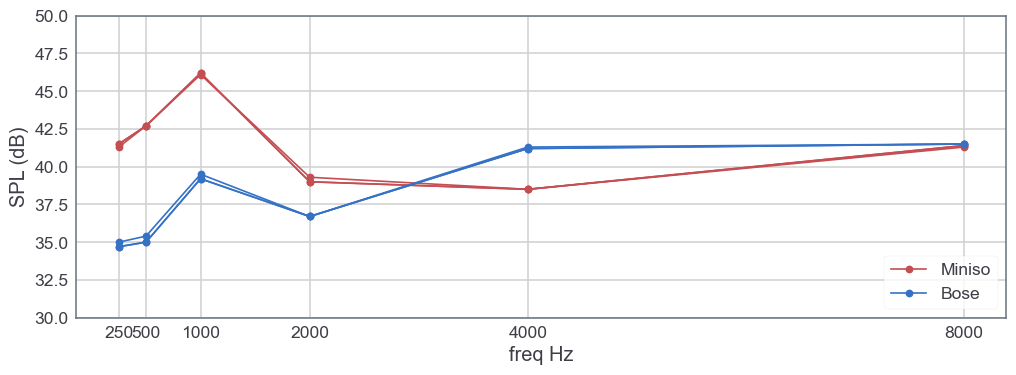

In [19]:
PlotSPLGroup(datpol.Ukur_Freq, datpol.Day1_Miniso1_Up[0,:,0], datpol.Day1_Miniso1_Up[1,:,0], datpol.Day1_Miniso1_Up[2,:,0], 'Miniso',
            datpol.Day1_Bose1_Up[0,:,0], datpol.Day1_Bose1_Up[1,:,0], datpol.Day1_Bose1_Up[2,:,0], 'Bose', [30,50])

### Average Array Bose

#### Prototype Unit 1

In [20]:
avg_bose_u1_up = (Array3Avg(datpol.Day1_Bose1_Up) +
                  Array3Avg(datpol.Day2_Bose1_Up) +
                  Array3Avg(datpol.Day3_Bose1_Up))/3
avg_bose_u1_up = np.around(avg_bose_u1_up,1)

avg_bose_u1_down = (Array3Avg(datpol.Day1_Bose1_Down) +
                    Array3Avg(datpol.Day2_Bose1_Down) +
                    Array3Avg(datpol.Day3_Bose1_Down))/3
avg_bose_u1_down = np.around(avg_bose_u1_down,1)

avg_bose_u1 = (avg_bose_u1_up + avg_bose_u1_down[:,::-1])/2
avg_bose_u1 = np.around(avg_bose_u1,1)
print(avg_bose_u1)

[[34.9 36.4 40.  44.6 52.  56.1 62.1 68.2 74.2]
 [35.3 37.4 41.4 46.6 52.2 58.2 64.2 70.3 76.4]
 [39.2 42.4 47.  52.5 58.3 64.3 70.3 76.4 82.4]
 [36.8 38.2 41.2 45.8 51.2 57.2 63.2 69.3 75.3]
 [41.4 44.  48.2 53.4 59.2 65.1 71.2 77.2 83.2]
 [42.  43.1 45.9 50.2 55.7 61.5 67.5 73.5 79.6]]


#### Plot grafik setiap frekuensi

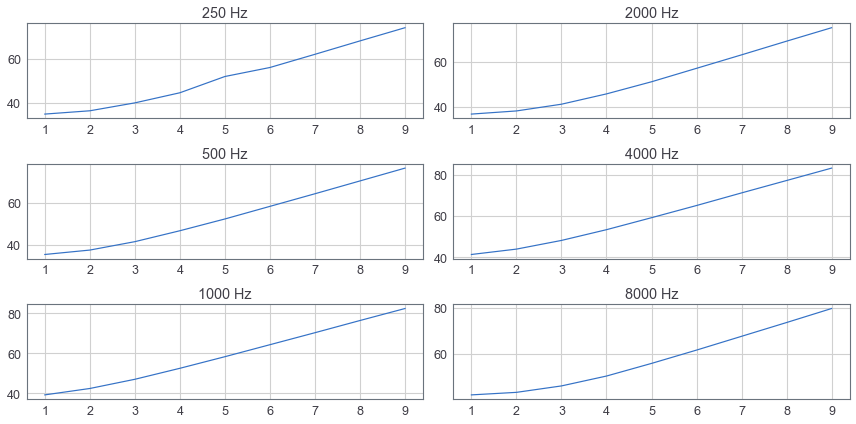

In [21]:
PlotSPLEachFreq(avg_bose_u1, "Prototype A")

#### Estimasi model polynomial

In [22]:
bose_u1 = FreqEstim(avg_bose_u1)

250 [-0.05  1.03 -0.59 34.21]
500 [-0.05  0.93  0.09 34.15]
1000 [-0.04  0.69  1.72 36.69]
2000 [-0.06  1.15 -1.58 37.22]
4000 [-0.04  0.85  0.68 39.78]
8000 [-0.06  1.2  -1.99 42.79]


#### Prototype Unit 2

In [23]:
avg_bose_u2_up = (Array3Avg(datpol.Day1_Bose2_Up) +
                  Array3Avg(datpol.Day2_Bose2_Up) +
                  Array3Avg(datpol.Day3_Bose2_Up))/3
avg_bose_u2_up = np.around(avg_bose_u2_up,1)

avg_bose_u2_down = (Array3Avg(datpol.Day1_Bose2_Down) +
                    Array3Avg(datpol.Day2_Bose2_Down) +
                    Array3Avg(datpol.Day3_Bose2_Down))/3
avg_bose_u2_down = np.around(avg_bose_u2_down,1)

avg_bose_u2 = (avg_bose_u2_up + avg_bose_u2_down[:,::-1])/2
avg_bose_u2 = np.around(avg_bose_u2,1)
print(avg_bose_u2)

[[34.8 36.  39.8 44.6 49.9 55.8 61.9 68.  74. ]
 [35.2 37.2 41.2 46.4 52.  58.  64.1 70.2 76.2]
 [38.9 42.1 46.8 52.2 58.  64.  70.1 76.1 82.1]
 [36.7 38.  41.  45.5 51.  56.9 63.  69.  75.1]
 [41.3 43.8 47.9 53.2 59.  64.9 70.9 77.  83. ]
 [41.8 43.  45.6 49.8 55.2 61.  67.  73.  79. ]]


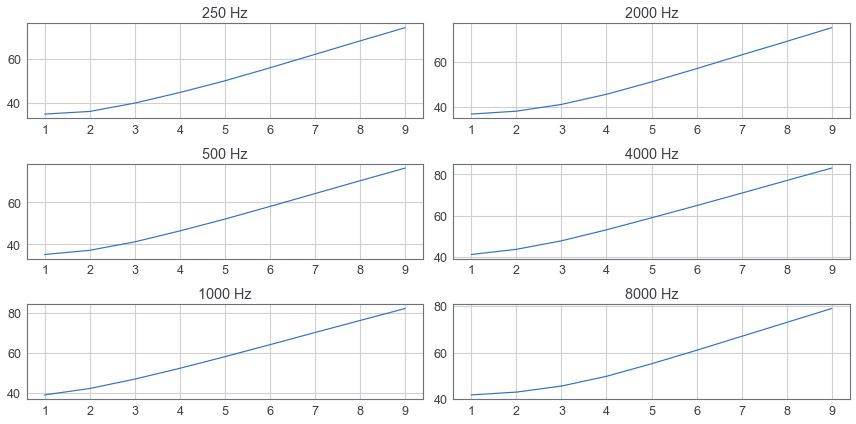

In [24]:
PlotSPLEachFreq(avg_bose_u2, "Prototype B")

In [25]:
bose_u2 = FreqEstim(avg_bose_u2)

250 [-0.05  1.08 -1.   34.56]
500 [-0.05  0.98 -0.12 34.21]
1000 [-0.04  0.69  1.74 36.38]
2000 [-0.06  1.17 -1.69 37.21]
4000 [-0.04  0.87  0.55 39.77]
8000 [-0.06  1.19 -2.06 42.73]


#### Selisih Matrix Unit 1 dan Unit 2

In [26]:
bose_u1 - bose_u2

array([[ 0.  , -0.05,  0.41, -0.35],
       [ 0.  , -0.05,  0.21, -0.06],
       [ 0.  ,  0.  , -0.02,  0.31],
       [ 0.  , -0.02,  0.11,  0.01],
       [ 0.  , -0.02,  0.13,  0.01],
       [ 0.  ,  0.01,  0.07,  0.06]])

### Efek histeresis

In [27]:
stdev_u1_d1 = HistCalc(datpol.Day1_Bose1_Up,datpol.Day1_Bose1_Down)
print(stdev_u1_d1)

[[ 0.2  0.3  0.2  0.2 11.8  0.1  0.1  0.   0.1]
 [ 0.2  0.   0.2  0.1  0.   0.   0.   0.1  0. ]
 [ 0.1  0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.1  0.1  0.1  0.   0.   0.   0. ]
 [ 0.1  0.1  0.1  0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.1  0.1  0.1  0.   0.   0.   0.   0. ]]


In [28]:
stdev_u1_d2 = HistCalc(datpol.Day2_Bose1_Up,datpol.Day2_Bose1_Down)
print(stdev_u1_d2)

[[0.1 0.1 0.2 0.1 0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]]


In [29]:
stdev_u1_d3 = HistCalc(datpol.Day3_Bose1_Up,datpol.Day3_Bose1_Down)
print(stdev_u1_d3)

[[0.1 0.2 0.2 0.1 0.2 0.  0.  0.  0. ]
 [0.2 0.1 0.1 0.1 0.1 0.1 0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.2 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.1 0.  0.1 0.  0.  0.  0. ]]


In [30]:
stdev_u2_d1 = HistCalc(datpol.Day1_Bose2_Up,datpol.Day1_Bose2_Down)
print(stdev_u2_d1)

[[0.3 0.1 0.2 0.1 0.1 0.1 0.  0.  0. ]
 [0.2 0.1 0.1 0.1 0.1 0.  0.  0.1 0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]]


In [31]:
stdev_u2_d2 = HistCalc(datpol.Day2_Bose2_Up,datpol.Day2_Bose2_Down)
print(stdev_u2_d2)

[[0.1 0.2 0.2 0.2 0.1 0.1 0.  0.1 0.1]
 [0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.  1.1 0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]]


In [32]:
stdev_u2_d3 = HistCalc(datpol.Day3_Bose2_Up,datpol.Day3_Bose2_Down)
print(stdev_u2_d3)

[[0.1 0.2 0.1 0.1 0.1 0.1 0.1 0.  0. ]
 [0.  0.4 0.2 0.2 0.  0.  0.  0.  0. ]
 [0.2 0.1 0.  0.  0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.  0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.  0.  0.  0.  0.  0.  0. ]]


In [33]:
TexTable(stdev_u2_d3,['1','2','3','4','5','6','7','8','9'])

\begin{tabular}{rrrrrrrrr}
\hline
   1 &   2 &   3 &   4 &   5 &   6 &   7 &   8 &   9 \\
\hline
 0.1 & 0.2 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 &   0 &   0 \\
 0   & 0.4 & 0.2 & 0.2 & 0   & 0   & 0   &   0 &   0 \\
 0.2 & 0.1 & 0   & 0   & 0.1 & 0   & 0   &   0 &   0 \\
 0.1 & 0.1 & 0   & 0.1 & 0   & 0   & 0   &   0 &   0 \\
 0.1 & 0.1 & 0.1 & 0   & 0   & 0   & 0   &   0 &   0 \\
 0.1 & 0.1 & 0   & 0   & 0   & 0   & 0   &   0 &   0 \\
\hline
\end{tabular}


### Average Array Miniso

#### Prototype Unit 1

In [34]:
avg_miniso_u1_up = (Array3Avg(datpol.Day1_Miniso1_Up) +
                  Array3Avg(datpol.Day2_Miniso1_Up) +
                  Array3Avg(datpol.Day3_Miniso1_Up))/3
avg_miniso_u1_up = np.around(avg_miniso_u1_up,1)

avg_miniso_u1_down = (Array3Avg(datpol.Day1_Miniso1_Down) +
                    Array3Avg(datpol.Day2_Miniso1_Down) +
                    Array3Avg(datpol.Day3_Miniso1_Down))/3
avg_miniso_u1_down = np.around(avg_miniso_u1_down,1)

avg_miniso_u1 = (avg_miniso_u1_up + avg_miniso_u1_down[:,::-1])/2
avg_miniso_u1 = np.around(avg_miniso_u1,1)
print(avg_miniso_u1)

[[41.5 44.9 49.8 55.3 61.2 67.1 73.2 79.2 85.2]
 [42.6 46.4 51.4 56.9 62.8 68.8 74.8 80.8 86.8]
 [46.2 49.9 54.9 60.5 66.4 72.3 78.3 84.3 90.3]
 [39.2 41.8 46.  51.2 57.1 63.  69.1 75.1 81.1]
 [38.6 39.4 41.5 45.3 50.5 56.2 62.3 68.4 74.4]
 [41.3 41.8 43.7 47.1 52.2 57.8 63.8 69.8 75.9]]


#### Plot grafik setiap frekuensi

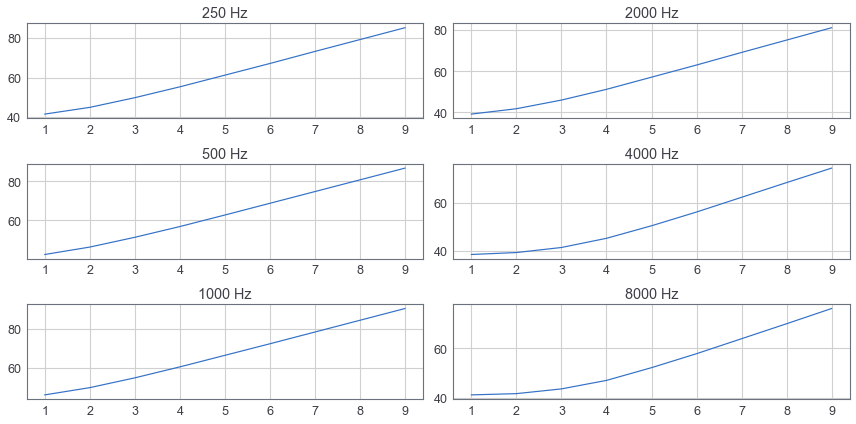

In [35]:
PlotSPLEachFreq(avg_miniso_u1, "Prototype A")

#### Estimasi model polynomial

In [36]:
miniso_u1 = FreqEstim(avg_miniso_u1)

250 [-0.03  0.63  2.17 38.59]
500 [-0.03  0.54  2.67 39.31]
1000 [-0.03  0.55  2.65 42.89]
2000 [-0.04  0.87  0.63 37.62]
4000 [-0.06  1.27 -2.85 40.3 ]
8000 [-0.06  1.28 -3.19 43.34]


#### Prototype Unit 2

In [37]:
avg_miniso_u2_up = (Array3Avg(datpol.Day1_Miniso2_Up) +
                  Array3Avg(datpol.Day2_Miniso2_Up) +
                  Array3Avg(datpol.Day3_Miniso2_Up))/3
avg_miniso_u2_up = np.around(avg_miniso_u2_up,1)

avg_miniso_u2_down = (Array3Avg(datpol.Day1_Miniso2_Down) +
                    Array3Avg(datpol.Day2_Miniso2_Down) +
                    Array3Avg(datpol.Day3_Miniso2_Down))/3
avg_miniso_u2_down = np.around(avg_miniso_u2_down,1)

avg_miniso_u2 = (avg_miniso_u2_up + avg_miniso_u2_down[:,::-1])/2
avg_miniso_u2 = np.around(avg_miniso_u2,1)
print(avg_miniso_u2)

[[41.2 44.6 49.2 54.8 60.7 66.7 72.7 78.7 84.7]
 [42.3 46.  50.9 56.6 62.4 68.4 74.4 80.4 86.4]
 [45.8 49.5 54.4 60.  66.  71.9 77.9 83.9 89.9]
 [38.8 41.4 45.6 50.8 56.5 62.5 68.6 74.6 80.6]
 [38.4 39.4 41.3 45.  50.1 55.9 61.9 68.  74. ]
 [41.3 41.8 43.2 46.5 51.4 57.  63.  69.  75. ]]


#### Plot grafik setiap frekuensi

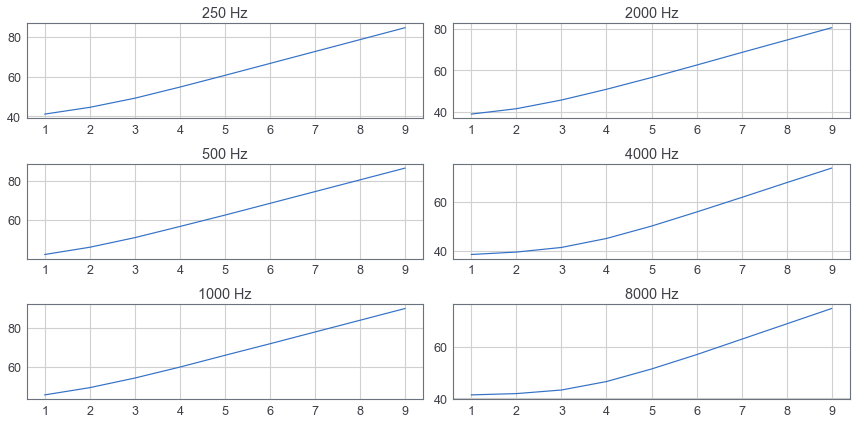

In [38]:
PlotSPLEachFreq(avg_miniso_u2, "Prototype B")

#### Estimasi model polynomial

In [39]:
miniso_u2 = FreqEstim(avg_miniso_u2)

250 [-0.04  0.68  1.89 38.55]
500 [-0.03  0.57  2.55 39.08]
1000 [-0.03  0.58  2.51 42.62]
2000 [-0.04  0.85  0.66 37.21]
4000 [-0.06  1.24 -2.78 40.13]
8000 [-0.06  1.32 -3.58 43.79]


#### Selisih Matrix Unit 1 dan Unit 2

In [40]:
miniso_u1 - miniso_u2

array([[ 0.01, -0.05,  0.28,  0.04],
       [ 0.  , -0.03,  0.12,  0.23],
       [ 0.  , -0.03,  0.14,  0.27],
       [ 0.  ,  0.02, -0.03,  0.41],
       [ 0.  ,  0.03, -0.07,  0.17],
       [ 0.  , -0.04,  0.39, -0.45]])

### Efek histeresis

In [41]:
stdev_miniso_u1_d1 = HistCalc(datpol.Day1_Miniso1_Up,datpol.Day1_Miniso1_Down)
print(stdev_miniso_u1_d1)

[[0.1 0.  0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.1]
 [0.  0.  0.1 0.1 0.  0.  0.  0.  0. ]
 [0.2 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.1 0.1 0.1 0.  0.  0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0. ]]


In [42]:
stdev_miniso_u1_d2 = HistCalc(datpol.Day2_Miniso1_Up,datpol.Day2_Miniso1_Down)
print(stdev_miniso_u1_d2)

[[0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.1 0.  0.  0.  0.1]]


In [43]:
stdev_miniso_u1_d3 = HistCalc(datpol.Day3_Miniso1_Up,datpol.Day3_Miniso1_Down)
print(stdev_miniso_u1_d3)

[[0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.1 0.  0.  0.  0.  0. ]]


In [44]:
stdev_miniso_u2_d1 = HistCalc(datpol.Day1_Miniso2_Up,datpol.Day1_Miniso2_Down)
print(stdev_miniso_u2_d1)

[[0.  0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.1 0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.2 0.1 0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]]


In [45]:
stdev_miniso_u2_d2 = HistCalc(datpol.Day2_Miniso2_Up,datpol.Day2_Miniso2_Down)
print(stdev_miniso_u2_d2)

[[0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.2 0.1 0.1 0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.1 0.  0.  0.  0. ]]


In [46]:
stdev_miniso_u2_d3 = HistCalc(datpol.Day3_Miniso2_Up,datpol.Day3_Miniso2_Down)
print(stdev_miniso_u2_d3)

[[0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.1 0.  0.  0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.  0.1 0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.  0.1 0.  0. ]]


In [47]:
TexTable(stdev_miniso_u2_d3,['1','2','3','4','5','6','7','8','9'])

\begin{tabular}{rrrrrrrrr}
\hline
   1 &   2 &   3 &   4 &   5 &   6 &   7 &   8 &   9 \\
\hline
 0.1 & 0.1 & 0.1 & 0.1 & 0   &   0 & 0   &   0 &   0 \\
 0.1 & 0.1 & 0.1 & 0.1 & 0   &   0 & 0   &   0 &   0 \\
 0   & 0   & 0   & 0   & 0   &   0 & 0   &   0 &   0 \\
 0.2 & 0.1 & 0   & 0   & 0.1 &   0 & 0   &   0 &   0 \\
 0.1 & 0.1 & 0.1 & 0   & 0.1 &   0 & 0   &   0 &   0 \\
 0.1 & 0.1 & 0.1 & 0.1 & 0.1 &   0 & 0.1 &   0 &   0 \\
\hline
\end{tabular}
